In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Wiener(n, dt):
  r = np.random.normal(0, np.sqrt(dt), size=n)
  s = np.sum(np.power(r, 2))/n
  t = np.power(np.sum(r)/n, 2)
  r = np.insert(np.cumsum(r), 0, [0])[:-1]
  return r, s, t

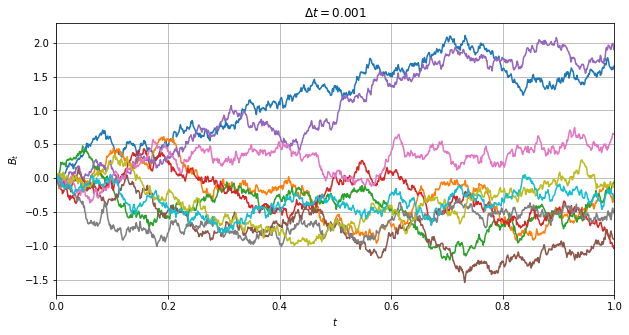

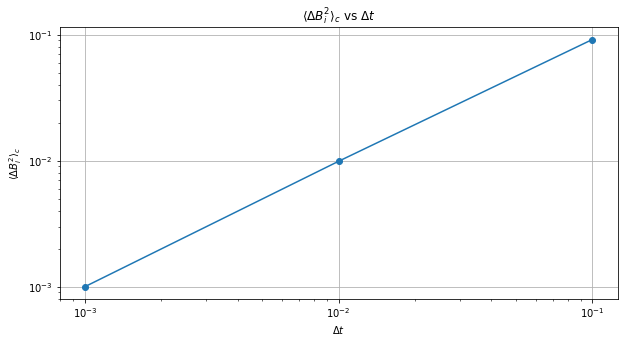

In [3]:
# Problem 4
N = 10
ti = 0
tf = 1
dt = [0.1, 0.01, 0.001]
db = []
dbv = []
for i in dt:
  plt.figure(0, figsize=(10, 5))
  plt.clf()
  plt.xlim([ti, tf])
  plt.ylabel("$B_t$")
  plt.xlabel("$t$")
  n = int((tf - ti)/i)
  DB = 0
  DBv = 0
  for j in range(N):
    r, dBs, dBm = Wiener(n, i)
    plt.plot(np.linspace(ti, tf, n), r, label=f"{dt}")
    DB += dBs
    DBv += dBm
  db.append(DB/N)
  dbv.append(DBv/N)
  plt.title(fr"$\Delta t = {i}$")
  plt.grid()
  plt.savefig(f"Wiener{i}.pdf", format="pdf")
plt.figure(1, figsize=(10, 5))
plt.plot(dt, db, "o-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\Delta t$")
plt.ylabel(r"$\langle\Delta B_i^2\rangle_c$")
plt.title(r"$\langle\Delta B_i^2\rangle_c$ vs $\Delta t$")
plt.grid()
plt.savefig("WienerdB.pdf", format="pdf")

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x360 with 0 Axes>

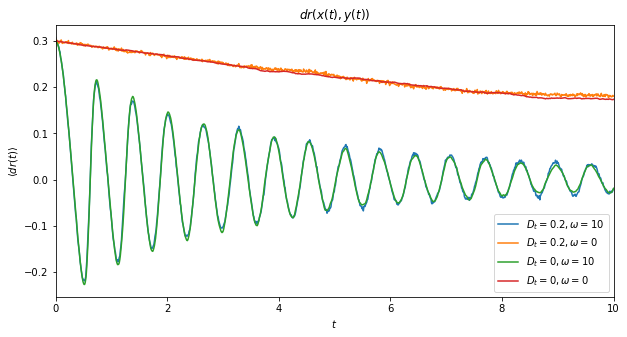

In [4]:
N = 5
Dr = 0.17     # Rotational Diffusion coefficient
Dt = [0.2, 0] # Translational Diffusion coefficient
v = 30        # Self propulsion speed
w = [10, 0]   # Average angular velocity
ti = 0
tf = 10
dt = 0.01
t = np.linspace(ti, tf, int((tf - ti)/dt))
for l in Dt:
  for k in w:
    dR = np.zeros(len(t) - 1)
    plt.figure(0, figsize=(10, 5))
    plt.figure(1, figsize=(10, 5))
    plt.figure(2, figsize=(10, 5))
    plt.figure(3, figsize=(10, 10))
    plt.figure(4, figsize=(10, 5))
    plt.figure(5, figsize=(10, 5))
    for j in range(N):
      dB = np.random.normal(0, np.sqrt(dt), size=(3, len(t)))
      T = np.insert(np.cumsum(k*dt + np.sqrt(2*Dr)*dB[0]), 0, [0])[:-1] # Theta
      X = np.insert(np.cumsum(v*np.cos(T)*dt + np.sqrt(2*l)*dB[1]), 0, [0])[:-1]
      Y = np.insert(np.cumsum(v*np.sin(T)*dt + np.sqrt(2*l)*dB[2]), 0, [0])[:-1]
      R = np.sqrt(np.power(X, 2) + np.power(Y, 2))
      dR += np.diff(R)
      plt.figure(0)
      plt.plot(t, T, label=f"{j + 1}")
      plt.figure(1)
      plt.plot(t, X, label=f"{j + 1}")
      plt.figure(2)
      plt.plot(t, Y, label=f"{j + 1}")
      plt.figure(3)
      plt.plot(X, Y, label=f"{j + 1}")
      plt.scatter(X[-1], Y[-1], c="b")
      plt.figure(4)
      plt.plot(t, R, label=f"{j + 1}")
    plt.figure(0)
    plt.ylabel("$\Theta(t)$")
    plt.xlabel("$t$")
    plt.title(f"$\Theta(t),\quad\omega = {k},\quad D_t = {l}$")
    plt.xlim(ti, tf)
    plt.legend()
    plt.savefig(f"MicroSwimmersTw{k}Dt{l}.pdf", format="pdf")
    plt.clf()
    plt.figure(1)
    plt.ylabel("$x(t)$")
    plt.xlabel("$t$")
    plt.title(f"$x(t),\quad\omega = {k},\quad D_t = {l}$")
    plt.xlim(ti, tf)
    plt.legend()
    plt.savefig(f"MicroSwimmersXw{k}Dt{l}.pdf", format="pdf")
    plt.clf()
    plt.figure(2)
    plt.ylabel("$y(t)$")
    plt.xlabel("$t$")
    plt.title(f"$y(t),\quad\omega = {k},\quad D_t = {l}$")
    plt.xlim(ti, tf)
    plt.legend()
    plt.savefig(f"MicroSwimmersYw{k}Dt{l}.pdf", format="pdf")
    plt.clf()
    plt.figure(3)
    plt.ylabel("$y(t)$")
    plt.xlabel("$x(t)$")
    plt.title(f"$(x(\Theta, t), y(\Theta, t)),\quad\omega = {k},\quad D_t = {l}$")
    plt.axis("square")
    plt.grid()
    plt.legend()
    plt.savefig(f"MicroSwimmersXYw{k}Dt{l}.pdf", format="pdf")
    plt.clf()
    plt.figure(4)
    plt.ylabel("$r(t)$")
    plt.xlabel("$t$")
    plt.title(f"$r(x(t), y(t)),\quad\omega = {k},\quad D_t = {l}$")
    plt.xlim(ti, tf)
    plt.ylim(0)
    plt.legend()
    plt.savefig(f"MicroSwimmersRw{k}Dt{l}.pdf", format="pdf")
    plt.clf()
    plt.figure(5)
    plt.plot(t[:-1], dR/N, label=f"$D_t = {l}, \omega = {k}$")
    plt.ylabel(r"$\langle dr(t)\rangle$")
    plt.xlabel("$t$")
    plt.title(f"$dr(x(t), y(t))$")
    plt.xlim(ti, tf)
    plt.legend()
    plt.savefig(f"MicroSwimmersdR{N}.pdf", format="pdf")
    plt.clf()

# Problem 5
N = 1000
Dr = 0.17     # Rotational Diffusion coefficient
Dt = [0.2, 0] # Translational Diffusion coefficient
v = 30        # Self propulsion speed
w = [10, 0]   # Average angular velocity
ti = 0
tf = 10
dt = 0.01
t = np.linspace(ti, tf, int((tf - ti)/dt))
for l in Dt:
  for k in w:
    dR = np.zeros(len(t))
    plt.figure(5, figsize=(10, 5))
    for j in range(N):
      dB = np.random.normal(0, np.sqrt(dt), size=(3, len(t)))
      T = np.insert(np.cumsum(k*dt + np.sqrt(2*Dr)*dB[0]), 0, [0])[:-1] # Theta
      X = np.insert(np.cumsum(v*np.cos(T)*dt + np.sqrt(2*l)*dB[1]), 0, [0])
      Y = np.insert(np.cumsum(v*np.sin(T)*dt + np.sqrt(2*l)*dB[2]), 0, [0])
      dR += np.diff(np.sqrt(np.power(X, 2) + np.power(Y, 2)))
    plt.figure(5)
    plt.plot(t, dR/N, label=f"$D_t = {l}, \omega = {k}$")
    plt.ylabel(r"$\langle dr(t)\rangle$")
    plt.xlabel("$t$")
    plt.title(f"$dr(x(t), y(t))$")
    plt.xlim(ti, tf)
    plt.legend()
    plt.savefig(f"MicroSwimmersdR{N}.pdf", format="pdf")